### Trainning Yolov3 on Colab to detect hand gun 

**1. Dataset**
The dataset I use for this project consists of 3000 images of hand guns in image folder and their annotation in label folder (required for Yolov3 training). You can download the dataset [here](http://www.mediafire.com/file/pvfircmboaelkxc/Gun_data_labeled.zip/file).

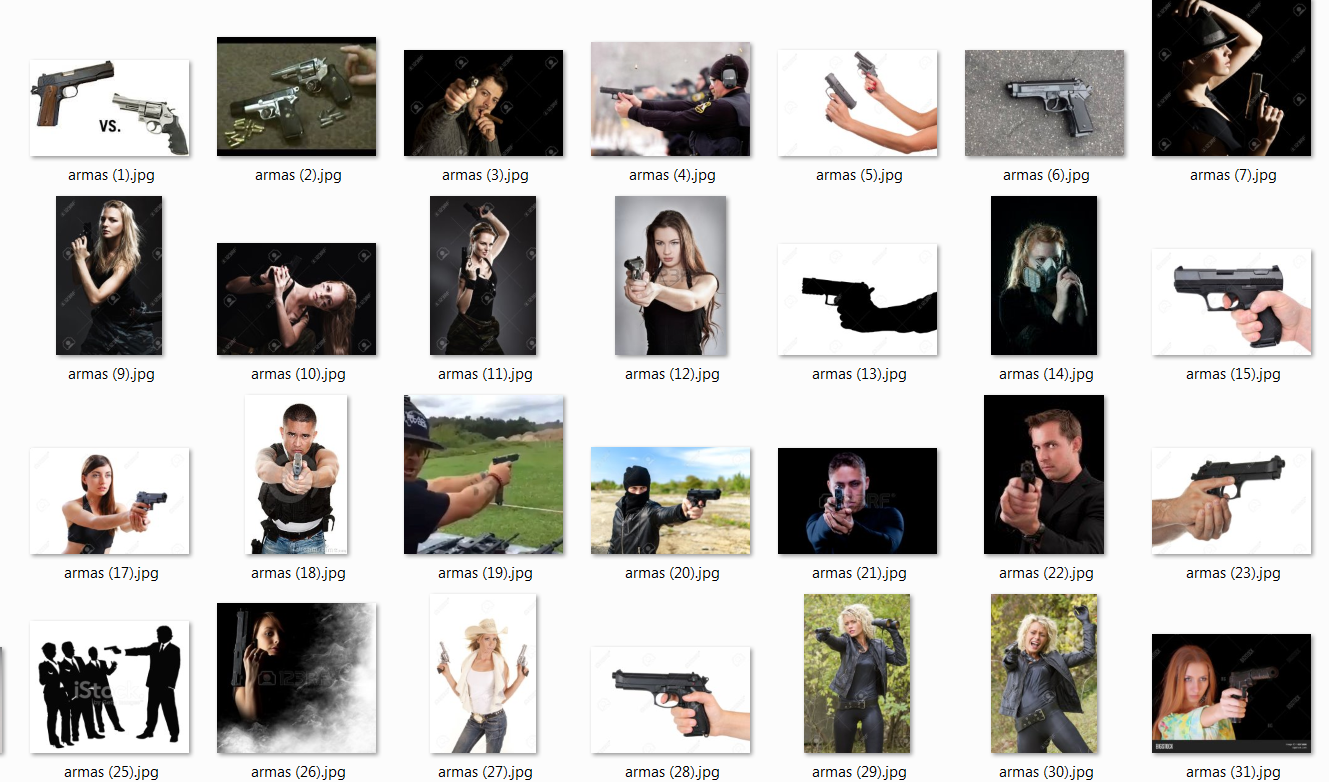

**2. Download and build Darknet in terminal (Linux)**
    - cd ~
    - git clone https://github.com/pjreddie/darknet
    - cd darknet
    - gedit Makefile 
    
Now you need to change GPU = 1 and OpenCV=1 and save the file.

**3. Go to cfg folder and copy file "yolov3.cfg" to new file called "yolov3_custom_train.cfg". Edit the file as below (or download it from [here](https://github.com/quangnhat185/Machine_learning_projects/tree/master/Gun_detection_Yolov3/train_configure_file)):**

    Line 8 & 9: width = 416, height = 416
    Line 20 max_batches = 6000
    Line 22 steps = 5400
    Line 603, 689, 776: filters = 18 (filters = (classes + 5)*3)
    Line 610, 696, 783: classes = 1

**4. Download train.txt and val.txt file from [here](https://github.com/quangnhat185/Machine_learning_projects/tree/master/Gun_detection_Yolov3/train_configure_file) and put them in data folder. Create the yolo.data file in darknet folder with content as:**

    classes= 1
    train  = data/train.txt
    valid  = data/test.txt
    names = data/obj.names
    backup = backup/
    
**5. Download the pre-trained weights for the convolutional layers and put them in darknet folder using this command: "**

    - cd darknet 
    - wget https://pjreddie.com/media/files/darknet53.conv.74
    
**6. In line 138 file detector.c in darknet/examples change to "if(i%1000==0 || (i < 1000 && i%100 == 0))". Now if the number of epoch is smaller than 1000 it will save every 100 epochs. On the other hand, it saves the weight every 1000 epoch. The weight file will be save in backup folder.**

**7. Now zip darknet folder and upload it on google drive. Open a notebook in colab and follow instruction as below.**

In [0]:
# import tensorflow as backend
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')


In [0]:
# check GPU status
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# Authorize for Colab to use you google drive
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
# Unzip the darknet file which you have uploaded on your drive
unzip "/content/gdrive/My Drive/darknet.zip"

In [3]:
%cd /content/darknet

[WinError 3] The system cannot find the path specified: '/content/darknet'
D:\Programing\Machine_learning_projects\Gun_detection_Yolov3


In [0]:
!make
!chmod +x ./darknet

make: Nothing to be done for 'all'.


In [0]:
%cd /content/darknet

/content/darknet


In [1]:
# Train our model
!./darknet detector train /content/darknet/yolo.data /content/darknet/cfg/yolov3_custom_train.cfg darknet53.conv.74

In [6]:
# Copy the weight from backup file to our drive
cp -i /content/darknet/backup /content/gdrive/My Drive